In [87]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator,SparsePauliOp
from qiskit.primitives import StatevectorEstimator,StatevectorSampler




Applying Phase shift to a target state

In [103]:
def apply_phase_shift(qc, target_state, phi):
    """
    Apply a phase shift to a specific computational basis state in a quantum circuit.

    Parameters:
    qc : QuantumCircuit
        The quantum circuit to which the phase shift will be applied.
    target_state : list[int]
        A binary list representing the target computational basis state (e.g., [1, 0, 1]).
    phi : float
        The phase shift to apply (in radians).
    """
    n = len(target_state)

    # Step 1: Apply X gates to flip qubits that need to be |0>
    for qubit, value in enumerate(target_state):
        if value == 0:
            qc.x(qubit)

    # Step 2: Apply a multi-controlled Z gate (equivalent to a phase flip)
    qc.h(n - 1)  # Turn the last qubit into a phase qubit
    qc.mcx(list(range(n - 1)), n - 1)  # Multi-controlled NOT targeting the last qubit
    qc.h(n - 1)  # Restore the last qubit

    # Undo the X gates
    for qubit, value in enumerate(target_state):
        if value == 0:
            qc.x(qubit)

Reflection Operator

In [104]:
def apply_reflection_about_mean(qc, n):
    """
    Apply the reflection about the mean (Grover diffuser).

    Parameters:
    qc : QuantumCircuit
        The quantum circuit to which the reflection will be applied.
    n : int
        Number of qubits.
    """
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


Visualization of the statevector histogram

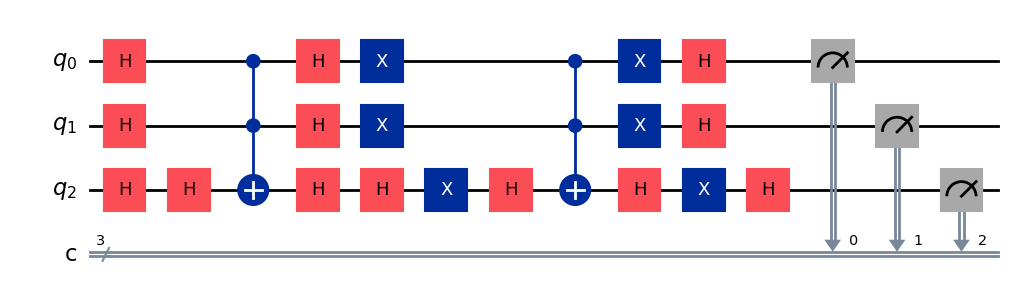

In [105]:
n = 3
target_state = [1, 1, 1]  # Mark the state |000>
phi = np.pi  # Phase shift

# Create the circuit and initialize superposition
qc = QuantumCircuit(n, n)
qc.h(range(n))  # Create uniform superposition

# Apply amplitude amplification
apply_phase_shift(qc, target_state, phi)
apply_reflection_about_mean(qc, n)

# Add measurement
qc.measure(range(n), range(n))

# Visualize the circuit
qc.draw("mpl")

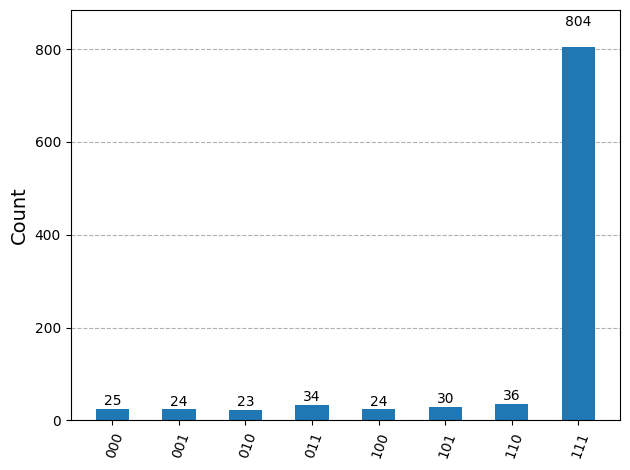

In [106]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Simulate the circuit
simulator = AerSimulator()
#qc_transpiled = transpile(qc, simulator)
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)